In [31]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import relevant modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

# Settings
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (16, 6)

Data Description
(from https://www.kaggle.com/c/titanic)

survival: Survival (0 = No; 1 = Yes)
pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name: Name
sex: Sex
age: Age
sibsp: Number of Siblings/Spouses Aboard
parch: Number of Parents/Children Aboard
ticket: Ticket Number
fare: Passenger Fare
cabin: Cabin
embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
Special Notes:

Pclass is a proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
Age is in Years; Fractional if Age less than One (1) If the Age is Estimated, it is in the form xx.5
With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored. The following are the definitions used for sibsp and parch.

Sibling: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse: Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent: Mother or Father of Passenger Aboard Titanic
Child: Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic
Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws. Some children travelled only with a nanny, therefore parch=0 for them. As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

In [32]:
# Load Titanic train dataset
#train_url = 'https://raw.githubusercontent.com/anup-jana/Python-Machine-Learning/master/Datasets/kaggle_titanic_train.csv'
train_url = 'C:/Users/ajana/Desktop/DSP - Python/kaggle_titanic_train.csv'
titanic_train_org = pd.read_csv(train_url)

# Load Titanic test dataset
#test_url = 'https://raw.githubusercontent.com/anup-jana/Python-Machine-Learning/master/Datasets/kaggle_titanic_test.csv'
test_url = 'C:/Users/ajana/Desktop/DSP - Python/kaggle_titanic_test.csv'
titanic_test_org = pd.read_csv(test_url)

In [33]:
# train set dimension
print('Train dataset dimension: {} rows, {} columns'.format(titanic_train_org.shape[0], titanic_train_org.shape[1]))

# test set dimension
print('Test dataset dimension: {} rows, {} columns'.format(titanic_test_org.shape[0], titanic_test_org.shape[1]))

# View train data
titanic_train_org.head()

Train dataset dimension: 891 rows, 12 columns
Test dataset dimension: 418 rows, 11 columns


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
# Descriptive statistics
titanic_train_org.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Harper, Rev. John",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


There are missing values in Age, Cabin and Embarked. Let's handle them temporarily using median function 

In [35]:
titanic_data = titanic_train_org

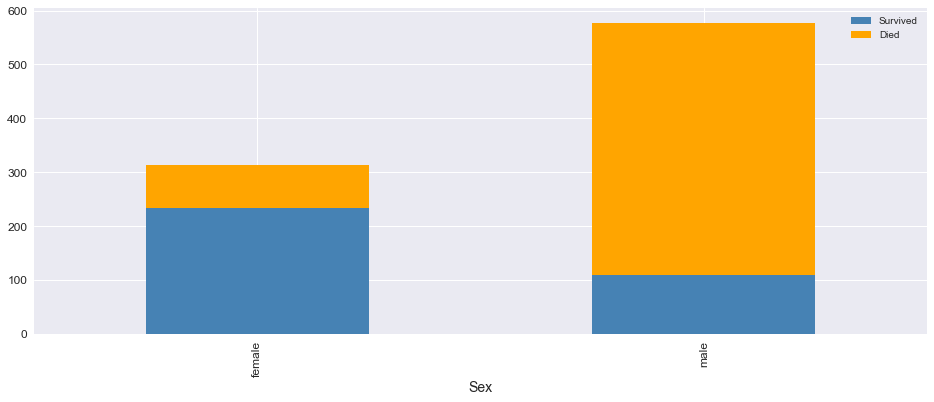

In [36]:
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())

titanic_data['Died'] = 1 - titanic_data['Survived']

titanic_data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', stacked=True, colors=['steelblue', 'orange']);

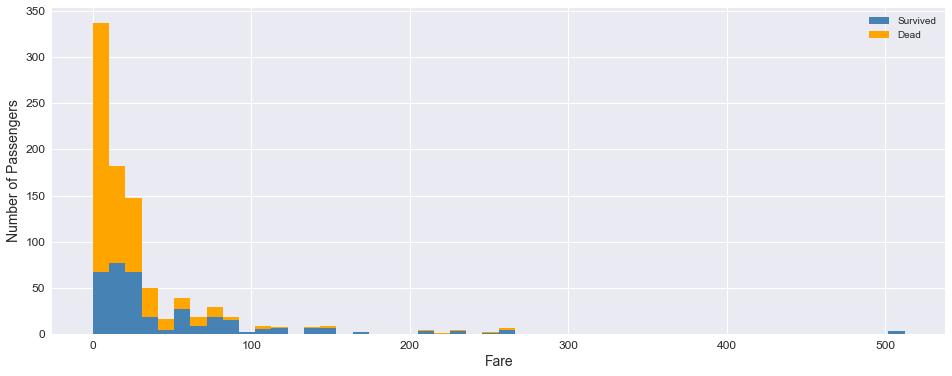

In [37]:
plt.hist([titanic_data[titanic_data['Survived'] == 1]['Fare'], titanic_data[titanic_data['Survived'] == 0]['Fare']], 
         stacked=True, color = ['steelblue', 'orange'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.legend();

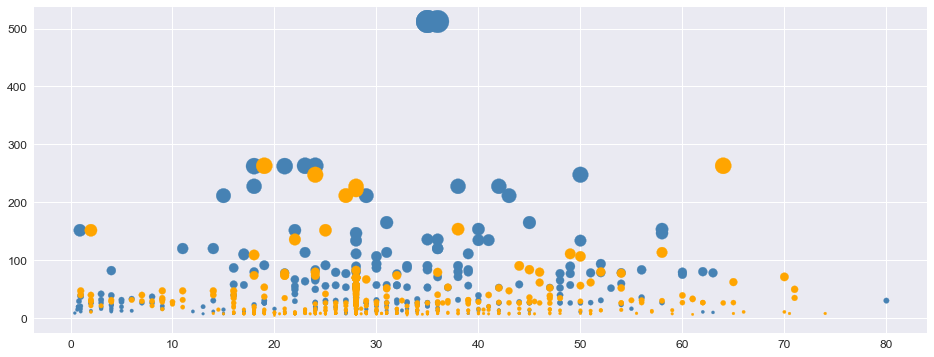

In [38]:
ax = plt.subplot()

ax.scatter(titanic_data[titanic_data['Survived'] == 1]['Age'], titanic_data[titanic_data['Survived'] == 1]['Fare'], 
           c='steelblue', s=titanic_data[titanic_data['Survived'] == 1]['Fare'])
ax.scatter(titanic_data[titanic_data['Survived'] == 0]['Age'], titanic_data[titanic_data['Survived'] == 0]['Fare'], 
           c='orange', s=titanic_data[titanic_data['Survived'] == 0]['Fare']);

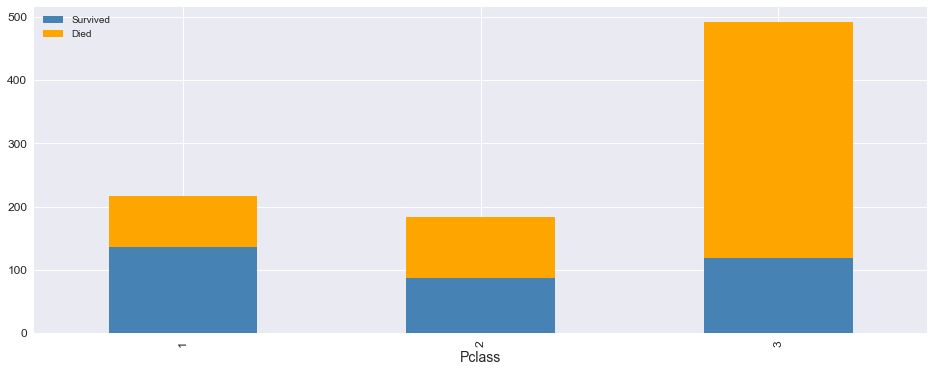

In [39]:
titanic_data.groupby('Pclass').agg('sum')[['Survived', 'Died']].plot(kind='bar', stacked=True, colors=['steelblue', 'orange']);

In [40]:
# Load Titanic train dataset
#train_url = 'https://raw.githubusercontent.com/anup-jana/Python-Machine-Learning/master/Datasets/kaggle_titanic_train.csv'
train_url = 'C:/Users/ajana/Desktop/DSP - Python/kaggle_titanic_train.csv'
titanic_train_org = pd.read_csv(train_url)

# Load Titanic test dataset
#test_url = 'https://raw.githubusercontent.com/anup-jana/Python-Machine-Learning/master/Datasets/kaggle_titanic_test.csv'
test_url = 'C:/Users/ajana/Desktop/DSP - Python/kaggle_titanic_test.csv'
titanic_test_org = pd.read_csv(test_url)

combined_data = pd.DataFrame()
combined_data = combined_data.append(titanic_train_org)
combined_data = combined_data.append(titanic_test_org)
combined_data.drop(['PassengerId'], axis=1, inplace=True)
combined_data.reset_index(drop=True, inplace=True)

# create indexes to separate data later on
train_idx = len(titanic_train_org)
test_idx = len(combined_data) - len(titanic_test_org)

print('Combined dataset dimension: {} rows, {} columns'.format(combined_data.shape[0], combined_data.shape[1]))

combined_data.head()

Combined dataset dimension: 1309 rows, 11 columns


,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


In [41]:
titles = set()
for name in combined_data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

print(titles)

{'Jonkheer', 'Lady', 'Mr', 'Capt', 'Ms', 'Don', 'Major', 'Mlle', 'Col', 'Dona', 'Master', 'Mme', 'Sir', 'Dr', 'Miss', 'Rev', 'the Countess', 'Mrs'}


In [42]:
# Option 1
#Title_Dictionary = {"Capt": "Officer", "Col": "Officer", "Major": "Officer", "Jonkheer": "Royalty", "Don": "Royalty",
#                    "Sir" : "Royalty", "Dr": "Officer", "Rev": "Officer", "the Countess":"Royalty", "Mme": "Mrs", "Mr" : "Mr",
#                    "Mlle": "Miss", "Ms": "Mrs", "Mrs" : "Mrs", "Miss" : "Miss", "Master" : "Master", "Lady" : "Royalty"}
# Option 2
Title_Dictionary = {"Capt": "Special", "Col": "Special", "Major": "Special", "Jonkheer": "Special", "Don": "Special",
                    "Sir" : "Special", "Dr": "Special", "Rev": "Special", "the Countess":"Special", "Mme": "Mrs", "Mr" : "Mr",
                    "Mlle": "Miss", "Ms": "Mrs", "Mrs" : "Mrs", "Miss" : "Miss", "Master" : "Master", "Lady" : "Special"}

# we extract the title from each name
combined_data['Title'] = combined_data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
# a map of more aggregated title
# we map each title
combined_data['Title'] = combined_data.Title.map(Title_Dictionary)
combined_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450,Mr


In [43]:
combined_data[combined_data['Title'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
1305,39.0,C105,C,108.9,"Oliva y Ocana, Dona. Fermina",0,1,female,0,NaN,PC 17758,NaN


In [44]:
combined_data.Title.value_counts()

Mr         757
Miss       262
Mrs        200
Master      61
Special     28
Name: Title, dtype: int64

In [45]:
print('Number of missing ages in train dataset: ', combined_data.iloc[:train_idx].Age.isnull().sum())
print('Number of missing ages in test dataset:  ', combined_data.iloc[train_idx:].Age.isnull().sum())

Number of missing ages in train dataset:  177
Number of missing ages in test dataset:   86


In [46]:
grouped_age_train = combined_data.iloc[:train_idx].groupby(['Sex','Pclass','Title'])
grouped_median_age_train = grouped_age_train.median()
grouped_median_age_train = grouped_median_age_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

grouped_median_age_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Special,48.0
3,female,2,Miss,24.0
4,female,2,Mrs,31.5


In [47]:
def fill_age(row):
    condition = (
        (grouped_median_age_train['Sex'] == row['Sex']) & 
        (grouped_median_age_train['Title'] == row['Title']) & 
        (grouped_median_age_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_age_train[condition]['Age'].values[0]

combined_data['Age'] = combined_data.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)

print('Number of missing ages in combined dataset: ', combined_data.Age.isnull().sum())

Number of missing ages in combined dataset:  0


In [48]:
print('Number of missing fares in train dataset: ', combined_data.iloc[:train_idx].Fare.isnull().sum())
print('Number of missing fares in test dataset:  ', combined_data.iloc[train_idx:].Fare.isnull().sum())

Number of missing fares in train dataset:  0
Number of missing fares in test dataset:   1


In [49]:
grouped_fare_train = combined_data.iloc[:891].groupby(['Pclass','Embarked'])
grouped_fare_median_train = grouped_fare_train.median()
grouped_fare_median_train = grouped_fare_median_train.reset_index()[['Pclass','Embarked', 'Fare']]

grouped_fare_median_train.head()

,Pclass,Embarked,Fare
0,1,C,78.2667
1,1,Q,90.0000
2,1,S,52.0000
3,2,C,24.0000
4,2,Q,12.3500


In [50]:
def fill_fare(row):
    condition = (
        (grouped_fare_median_train['Embarked'] == row['Embarked']) & 
        (grouped_fare_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_fare_median_train[condition]['Fare'].values[0]

combined_data['Fare'] = combined_data.apply(lambda row: fill_fare(row) if np.isnan(row['Fare']) else row['Fare'], axis=1)

print('Number of missing fare in combined dataset: ', combined_data.Fare.isnull().sum())

Number of missing fare in combined dataset:  0


In [51]:
# Did they have a Cabin?
#combined_data['Has_Cabin'] = ~combined_data.Cabin.isnull()
combined_data['Has_Cabin'] = np.where(combined_data.Cabin.isnull() , 0, 1)

# fill Cabin NaN with U for unknown
combined_data.Cabin = combined_data.Cabin.fillna('U')

# map first letter of cabin to itself
combined_data.Cabin = combined_data.Cabin.map(lambda x: x[0])

# find most frequent Embarked value and store in variable
most_embarked = combined_data.Embarked.value_counts().index[0]

# fill NaN with most_embarked value
combined_data.Embarked = combined_data.Embarked.fillna(most_embarked)

In [52]:
# size of families (including the passenger)
combined_data['FamilySize'] = combined_data.Parch + combined_data.SibSp + 1

combined_data['PclassFare'] = combined_data.Pclass*combined_data.Fare

# introducing other features based on the family size
#combined_data['Singleton'] = combined_data['FamilySize'].map(lambda s: 1 if s == 1 else 0)
#combined_data['SmallFamily'] = combined_data['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
#combined_data['LargeFamily'] = combined_data['FamilySize'].map(lambda s: 1 if 5 <= s else 0)

In [53]:
# Binning numerical columns
#combined_data['CatAge']  = pd.qcut(combined_data.Age, q=4, labels=False )
#combined_data['CatFare'] = pd.qcut(combined_data.Fare, q=4, labels=False)
#combined_data['CatPclassFare'] = pd.qcut(combined_data.PclassFare, q=4, labels=False)

In [54]:
# Convert the male and female groups to integer form
combined_data.Sex = combined_data.Sex.map({"male": 0, "female":1})
#combined_data.Has_Cabin = combined_data.Has_Cabin.map({"True": 1, "False":0})
combined_data.Embarked = combined_data.Embarked.map({'S': 1, 'C':2, 'Q':3})

combined_data['Child'] = np.where(combined_data.Age < 18, 1, 0)

# create dummy variables for categorical features
#pclass_dummies = pd.get_dummies(combined_data.Pclass, prefix="Pclass")
#cabin_dummies = pd.get_dummies(combined_data.Cabin, prefix="Cabin")

title_dummies = pd.get_dummies(combined_data.Title, prefix="Title")
#embarked_dummies = pd.get_dummies(combined_data.Embarked, prefix="Embarked")

# concatenate dummy columns with main dataset
combined_data = pd.concat([combined_data, title_dummies], axis=1)

# drop categorical fields
#combined_data.drop(['Pclass', 'Title', 'Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

combined_data.drop(['Title', 'Cabin', 'Name', 'Ticket', 'Parch', 'SibSp'], axis=1, inplace=True)
combined_data.head()

,Age,Embarked,Fare,Pclass,Sex,Survived,Has_Cabin,FamilySize,PclassFare,Child,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Special
0,22.0,1,7.2500,3,0,0.0,0,2,21.7500,0,0,0,1,0,0
1,38.0,2,71.2833,1,1,1.0,1,2,71.2833,0,0,0,0,1,0
2,26.0,1,7.9250,3,1,1.0,0,1,23.7750,0,0,1,0,0,0
3,35.0,1,53.1000,1,1,1.0,1,2,53.1000,0,0,0,0,1,0
4,35.0,1,8.0500,3,0,0.0,0,1,24.1500,0,0,0,1,0,0


In [55]:
# create train and test data
train = combined_data[ :train_idx]
test = combined_data[test_idx: ]

# convert Survived back to int
#train.Survived = train.Survived.astype(int)

# Stratified sampling based on the service feature categorical values
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=50)
for train_index, test_index in split.split(train, train['Sex']):
    strat_train_set = train.loc[train_index]
    strat_test_set = train.loc[test_index]

# Print number of instances for train and test dataset
print("Stratified Sampling: ", len(strat_train_set), "train +", len(strat_test_set), "test")

Stratified Sampling:  712 train + 179 test


In [56]:
# separate target column from encoded data and remove categorical feature for whom dummy variables were created
strat_train_set_X = strat_train_set.drop(['Survived'], axis=1)
strat_test_set_X = strat_test_set.drop(['Survived'], axis=1)

strat_train_set_y = strat_train_set[['Survived']].copy()
strat_test_set_y = strat_test_set[['Survived']].copy()

# Final test set
final_test_X = test.drop('Survived', axis=1).values

print('Train dataset dimension: {} rows, {} columns'.format(strat_train_set_X.shape[0], strat_train_set_X.shape[1]))
print('Test dataset dimension: {} rows, {} columns'.format(strat_test_set_X.shape[0], strat_test_set_X.shape[1]))

Train dataset dimension: 712 rows, 14 columns
Test dataset dimension: 179 rows, 14 columns


               importance
feature                  
Age                 0.193
Fare                0.176
PclassFare          0.141
Title_Mr            0.100
Sex                 0.088
Pclass              0.066
Title_Mrs           0.058
FamilySize          0.056
Has_Cabin           0.036
Embarked            0.031
Title_Miss          0.028
Title_Master        0.012
Child               0.008
Title_Special       0.005


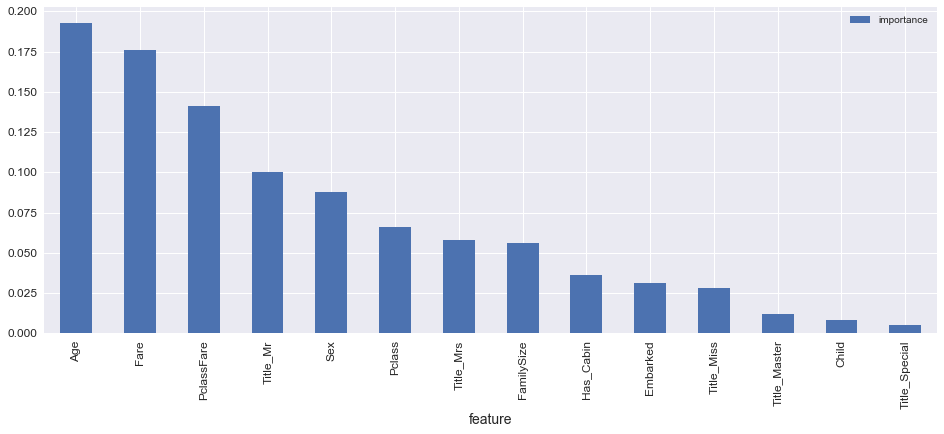

In [57]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier();

refclasscol = strat_train_set_X.columns

# fit random forest classifier on the training set
rfc_model.fit(strat_train_set_X, strat_train_set_y);

# extract important features
score = np.round(rfc_model.feature_importances_, 3)
importances = pd.DataFrame({'feature':refclasscol, 'importance':score})
importances = importances.sort_values('importance', ascending=False).set_index('feature')

# plot importances
importances.plot.bar();

print(importances)

In [58]:
feat_imp_threshold = importances.loc[importances['importance'] < np.max(importances['importance'])]

from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score

# fit model using each importance as a threshold
thresholds = np.sort(np.unique(feat_imp_threshold.importance))
for thresh in thresholds:
    # selecting features using threshold
    selection = SelectFromModel(rfc_model, threshold=thresh, prefit=True)
    select_train_x = selection.transform(strat_train_set_X)
    
    # training model
    selection_model = RandomForestClassifier()
    selection_model.fit(select_train_x, strat_train_set_y)
    scores = cross_val_score(selection_model, select_train_x, strat_train_set_y, cv=10)
    
    # prediction through model
    select_test_x = selection.transform(strat_test_set_X)
    pred_y = selection_model.predict(select_test_x)
    
    # evaluating model
    accuracy = metrics.accuracy_score(strat_test_set_y, pred_y)
    confusion = metrics.confusion_matrix(strat_test_set_y, pred_y)
    TP = confusion[1][1]; TN = confusion[0][0]; FP = confusion[0][1]; FN = confusion[1][0];
    sensitivity = TP / float(TP + FN); specifivity = TN / float(TN + FP);
    
    print("Thresh=%.3f, n=%d, Test Accuracy: %.2f%%, Cross Val Mean Score=%.2f%%, Sensitivity=%.2f%%, Specifivity=%.2f%%" % 
          (thresh, select_train_x.shape[1], accuracy*100.0, scores.mean()*100.0, sensitivity*100.0, specifivity*100.0))


Thresh=0.005, n=14, Test Accuracy: 81.01%, Cross Val Mean Score=80.35%, Sensitivity=75.00%, Specifivity=84.68%
Thresh=0.008, n=13, Test Accuracy: 82.68%, Cross Val Mean Score=80.05%, Sensitivity=75.00%, Specifivity=87.39%
Thresh=0.012, n=11, Test Accuracy: 82.68%, Cross Val Mean Score=81.18%, Sensitivity=76.47%, Specifivity=86.49%
Thresh=0.028, n=11, Test Accuracy: 82.68%, Cross Val Mean Score=80.06%, Sensitivity=76.47%, Specifivity=86.49%
Thresh=0.031, n=10, Test Accuracy: 84.36%, Cross Val Mean Score=81.33%, Sensitivity=77.94%, Specifivity=88.29%
Thresh=0.036, n=9, Test Accuracy: 81.56%, Cross Val Mean Score=79.93%, Sensitivity=75.00%, Specifivity=85.59%
Thresh=0.056, n=8, Test Accuracy: 79.89%, Cross Val Mean Score=81.19%, Sensitivity=76.47%, Specifivity=81.98%
Thresh=0.058, n=7, Test Accuracy: 81.01%, Cross Val Mean Score=80.76%, Sensitivity=73.53%, Specifivity=85.59%
Thresh=0.066, n=5, Test Accuracy: 78.77%, Cross Val Mean Score=79.34%, Sensitivity=67.65%, Specifivity=85.59%
Thres

In [62]:
final_selection = SelectFromModel(rfc_model, threshold=0.006, prefit=True)
final_train_x = final_selection.transform(strat_train_set_X)
    
# training model
final_modelRF = RandomForestClassifier(n_estimators=300, max_depth=10)
final_modelRF.fit(final_train_x, strat_train_set_y)
scores = cross_val_score(final_modelRF, final_train_x, strat_train_set_y, cv=10)
    
# prediction through model
final_test_x = final_selection.transform(strat_test_set_X)
pred_y = final_modelRF.predict(final_test_x)
    
# evaluating model
accuracy = metrics.accuracy_score(strat_test_set_y, pred_y)
confusion = metrics.confusion_matrix(strat_test_set_y, pred_y)
TP = confusion[1][1]; TN = confusion[0][0]; FP = confusion[0][1]; FN = confusion[1][0];
sensitivity = TP / float(TP + FN); specifivity = TN / float(TN + FP);

print("Thresh=%.3f, n=%d, Test Accuracy: %.2f%%, Cross Val Mean Score=%.2f%%, Sensitivity=%.2f%%, Specifivity=%.2f%%" % 
    (thresh, select_train_x.shape[1], accuracy*100.0, scores.mean()*100.0, sensitivity*100.0, specifivity*100.0))
print(final_modelRF)

Thresh=0.176, n=2, Test Accuracy: 84.92%, Cross Val Mean Score=82.59%, Sensitivity=77.94%, Specifivity=89.19%
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [63]:
# random forrest prediction on test set
submission_test_x = final_selection.transform(final_test_X)
submission_pred = final_modelRF.predict(submission_test_x)

# save PassengerId for final submission
passengerId = titanic_test_org.PassengerId

# convert output to integert
final_survived = submission_pred.astype(int)

# dataframe with predictions
kaggle = pd.DataFrame({'PassengerId': passengerId, 'Survived': final_survived})

# save to csv
kaggle.to_csv('C:/Users/ajana/Desktop/DSP - Python/gender_submission.csv', index=False)